# Getting Started with Brightway2

This is an introduction to Brightway2, an open source framework for Life Cycle Assessment. This notebook will cover the basics of databases and activities and looking at LCI databases and LCIA methods.

At the end of this notebook, you will be able to:

* Import basic data like the biosphere database
* Import and explore the [FORWAST](http://forwast.brgm.fr/) database

If you finish the notebook, you get a kitten.

This introduction is written in an Jupyter notebook, an online scientific notebook which combines, text, data, images, and programming. It is amazing, and could be a fantastic way to do and communicate advanced LCA work. See the [documentation](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) and a list of [awesome examples](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks). Please see the [Brightway2 documentation](https://docs.brightwaylca.org) for a complete list of [example Brightway2 notebooks](https://docs.brightwaylca.org).

You should **download this notebook** and run it cell by cell - don't just read it on the web!

# Starting at the beginning

Import brightway2.

In [1]:
from brightway2 import *

## Python 2 and 3

Brightway2 is compatible with both Python 2 and 3. If you are using Python 2, I strongly recommend you execute the following cell, which will make all your text string unicode without have to type the letter ``"u"`` in front of each text string. On Python 3, the following **doesn't do anything** - your text strings are unicode by default.

I won't include this cell in future notebooks, but you should copy and paste it if you will use Python 2.

In [2]:
from __future__ import unicode_literals, print_function

## Projects

In Brightway2, a project is a separate directory with its own copies of LCI databases, LCIA methods, and any other data you use. Each research project or article should probably be its own project, so that any changes you want to make will not interfere with your other work.

The default project is called ``default``:

In [3]:
projects.current

'default'

Each project is stored in a separate directory in a place in your filesystem reserved for application data. It varies depending on the operating system; on OS X, this is the `Library` directory in your user home directory:

In [4]:
projects.dir

'/Users/cmutel/Library/Application Support/Brightway3/default.c21f969b5f03d33d43e04f8f136e7682'

However, you really need to care about the specifics. 

We can create a new project:

In [5]:
projects.current = "BW2 introduction"

And list the available projects:

In [40]:
projects

Brightway2 projects manager with 25 objects, including:
	3.2
	BW2 Tutorial 1
	BW2 Tutorial 4
	BW2 introduction
	CAES
	Class 1
	Class 2
	Class 3
	Class 5
	THRIVE
Use `list(projects)` to get full list, `projects.report()` to get
	a report on all projects.

## Getting basic data

Let's import some basic data - a database of elementary flows, some LCIA methods, and some metadata used for importing other databases:

In [7]:
bw2setup()

Creating default biosphere

Applying strategy: normalize_units

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 0.624 sec



Applying strategy: drop_unspecified_subcategories
Applied 2 strategies in 0.01 seconds
Title: Writing activities to SQLite3 database:
  Started: 02/23/2016 18:49:08
  Finished: 02/23/2016 18:49:09
  Total time elapsed: 0.624 sec
  CPU %: 91.300000
  Memory %: 1.416159
Created database: biosphere3
Creating default LCIA methods

Applying strategy: normalize_units
Applying strategy: set_biosphere_type
Applying strategy: drop_unspecified_subcategories
Applying strategy: link_iterable_by_fields
Applied 4 strategies in 1.74 seconds
Wrote 665 LCIA methods with 169551 characterization factors
Creating core data migrations



The iPython notebook by default prints all logged messages. On your machine, there might be messages tracking how long it took to download and process the biosphere and methods packages.

## A biosphere dataset

The ``biosphere3`` database was installed. It is called the ``biosphere3`` database because elementary flow names are normalized to the ecoinvent 3 standard.

Let's see how many flows there are in this database, and then look at one random flow:

In [8]:
db = Database("biosphere3")
print("Number of flows in `biosphere3`:", len(db))
random_flow = db.random()
print(random_flow)

Number of flows in `biosphere3`: 4018
'Ethene, trichloro-' (kilogram, None, ('water', 'surface water'))


In [9]:
print(random_flow['name'])
print(random_flow['unit'])
print(random_flow['categories'])

Ethene, trichloro-
kilogram
('water', 'surface water')


Brightway2 uses keys to identify datasets. Each dataset is identified by a combination of its database and some unique code. The code can be anything - a number, a UUID, or just a name. All of the following would be valid keys:

    ("biosphere", "f66d00944691d54d6b072310b6f9de37")
    ("my new database", "building my dream house")
    ("skynet", 14832)

In [10]:
random_flow.key

('biosphere3', 'c4bc70e8-d445-4ca4-bc89-fc93819791e3')

## An LCIA method dataset

We also installed a large number of LCIA methods:

In [11]:
len(methods)

665

Because LCIA methods have many different impact categories, they are identified not by a single label, but by a list of labels. Let's look at an example:

In [12]:
method_key = methods.random()
method_key

('ReCiPe Endpoint (I,A)', 'ecosystem quality', 'climate change, ecosystems')

In this case, the LCIA method has three levels of specificity, from the general name (first level) to the specific impact category (last level). There is nothing magic about three levels - you could have one, or one hundred - but Brightway2 expects that LCIA methods will be a list of text labels ``('like', 'this')``.

Note that method identifiers need to be a special kind of list that uses `()` instead of `[]`. These are called `tuples`. To create a tuple with only one element, you need to add a comma, to distinguish it from a set of parentheses:

In [13]:
print (1 + 2)           # This is not a tuple
print (1,), type((1,))  # This is a tuple with one element

3
1


(None, tuple)

We can load the method data, show a sample.

Method data has the format:

    biosphere flow, numeric value, location

Where:

* `biosphere flow` is a dataset from any database which is used as a biosphere flow.
* `numeric value` can be either a fixed number or an uncertainty distribution.
* `location` is optional; the default value is that this characterization factor is valid everywhere.

The method data format is pretty flexible, and the following are all acceptable:

    [('biosphere', 'CO2'), 1.0],                                             # Default location
    [('biosphere', 'CO2'), 1.0, 'Australia, mate!'],                         # Custom location
    [('biosphere', 'CO2'), 1.0, ('Population density', 'Raster cell 4,2')],  # Location inside a geocollection
    [('biosphere', 'CO2'), {'amount': 1.0, 'uncertainty type': 0}],          # Uncertain characterization factor

[Geocollections](http://brightway2-regional.readthedocs.org/#spatial-scales-geocollections) are needed for regionalized LCA.

If you are wondering why we need to identify biosphere flows like `('biosphere', '2fe885840cebfcc7d56b607b0acd9359')`, this is a good question! The short answer is that there is no single field that uniquely identifies biosphere flows or activities. The longer answer [is in the manual](http://brightway2.readthedocs.org/en/latest/lci.html#uniquely-identifying-datasets).

Brightway2 is designed to be flexible enough for many different problems. Therefore, there are no limits on what constitutes a biosphere flow. Rather, anything that is linked to in a biosphere exchange will be put in the biosphere matrix. We installed a database called `biosphere3`, but you can define new flows in a database alongside process datasets, or create your own biosphere database.

In [14]:
method_data = Method(method_key).load()
print("Number of CFs:", len(method_data))
method_data[:20]

Number of CFs: 193


[(('biosphere3', 'e259263c-d1f1-449f-bb9b-73c6d0a32a00'), 0.0170514580645),
 (('biosphere3', '16eeda8a-1ea2-408e-ab37-2648495058dd'), 0.0170514580645),
 (('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 0.0170514580645),
 (('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e'), 0.0170514580645),
 (('biosphere3', 'f9749677-9c9f-4678-ab55-c607dfdc2cb9'), 0.0170514580645),
 (('biosphere3', '5188df39-2bb8-4826-b469-fa9f86bacc09'), 0.175145864516),
 (('biosphere3', 'e1c597cc-14cb-4ebb-af07-7a93a5b77d34'), 0.0170514580645),
 (('biosphere3', '6d89125e-e9b7-4d7e-a1fc-ada45dbd8815'), 0.0170514580645),
 (('biosphere3', '78eb1859-abd9-44c6-9ce3-f3b5b33d619c'), 0.0170514580645),
 (('biosphere3', 'e4e9febc-07c1-403d-8d3a-6707bb4d96e6'), 0.0170514580645),
 (('biosphere3', 'e8787b5e-d927-446d-81a9-f56977bbfeb4'), 0.0170514580645),
 (('biosphere3', '375bc95e-6596-4aa1-9716-80ff51b9da77'), -0.175145864516),
 (('biosphere3', '78259cf2-1bb2-41ec-941c-9d70909df094'), 1.84155747097),
 (('biosphere3'

# Importing the FORWAST LCI database

We will use the FORWAST database, as it is both a high quality, comprehensive LCI database, and freely available. [FORWAST](http://forwast.brgm.fr/Overview.asp) is a physical MRIO table for Europe. It can be downloaded directly from the [2.-0 website](http://lca-net.com/projects/show/forwast/).

The following cell will download and install the FORWAST database. Note that an internet connection is required.

In [15]:
import zipfile
import os
from bw2data.utils import download_file

filepath = download_file("forwast.bw2package.zip", url="http://lca-net.com/wp-content/uploads/")
dirpath = os.path.dirname(filepath)
zipfile.ZipFile(filepath).extractall(dirpath)
BW2Package.import_file(os.path.join(dirpath, "forwast.bw2package"))

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 4.757 sec


Title: Writing activities to SQLite3 database:
  Started: 02/23/2016 18:52:21
  Finished: 02/23/2016 18:52:26
  Total time elapsed: 4.757 sec
  CPU %: 85.100000
  Memory %: 3.455496


[Brightway2 SQLiteBackend: forwast]

# Basic LCA calculations

Let's pick and random process and LCIA method:

In [16]:
process = Database("forwast").random()
process

'110 Waste treatment, Landfill of waste, Iron, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])

A brief review of LCA calculations:

In matrix-based LCA, we construct a *technosphere* matrix, which describes the inputs needed to produce different products (e.g. cars need metal and electricity), and a *biosphere* matrix, which describes the emissions and resource consumption associated with the production of each product (e.g. car manufacturing releases air emissions). These two matrices come from the life cycle inventory database(s). We also have a *functional unit*, which is what we are trying to assess, e.g. one car. We then calculate the *life cycle inventory* (LCI) by first solving the linear system of the technosphere matrix and the functional unit, and then by multiplying the biosphere matrix.

To do *life cycle impact assessment* (LCIA), we multiply the life cycle inventory by a matrix of characterization factors, which tell how bad different emissions and resource consumptions are.

For more details on the math, see the [manual](https://docs.brightwaylca.org/lca.html).

So, our first step is to specify the functional unit, which is relatively easy:

In [17]:
functional_unit = {process: 1}

We can then instantiate our [LCA object](https://docs.brightwaylca.org/technical/bw2calc.html#lca). 

In [18]:
lca = LCA(functional_unit, method_key)

And do the LCI and LCIA calculations:

In [19]:
lca.lci()
lca.lcia()

Finally, we can print the LCA score:

In [20]:
lca.score

0.0012318664716984887

# Looking into the LCA object

Let's see what is in this `LCA` thing, anyway. Put your cursor in the following cell and hit tab:

In [ ]:
lca.

So, there is a lot. Let's look at a few things:

* The technosphere matrix

In [22]:
lca.technosphere_matrix

<277x277 sparse matrix of type '<class 'numpy.float64'>'
	with 36825 stored elements in Compressed Sparse Row format>

* The biosphere matrix

In [23]:
lca.biosphere_matrix

<20x277 sparse matrix of type '<class 'numpy.float64'>'
	with 2170 stored elements in Compressed Sparse Row format>

* The characterization matrix

In [24]:
lca.characterization_matrix

<20x20 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

# Graphing matrices

Sometimes it can be helpful to visualize both the inputs and calculation results.

In [25]:
%matplotlib inline

In [26]:
from bw2analyzer.matrix_grapher import SparseMatrixGrapher

First, let's look at the technosphere matrix.

You can pass in a filename to get a higher resolution figure saved as a file.

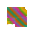

In [42]:
SparseMatrixGrapher(lca.technosphere_matrix).ordered_graph()

Not so interesting - I am sure your inventory data will be much nicer. The problem is that this is an IO matrix, so there is a value at each point, even if it is small, and this graph only shows where values are or aren't zero. For example, here is the same graph for ecoinvent 3.2 (cutoff):

<img src="files/ecoinvent-32-cutoff.png">

What about the biosphere matrix?

In [28]:
SparseMatrixGrapher(lca.biosphere_matrix).graph()

And the characterized inventory?

In [29]:
SparseMatrixGrapher(lca.characterized_inventory).graph()

# Contribution analysis

We can calculate the most important activities and biosphere flows.

In [31]:
from bw2analyzer import ContributionAnalysis

Most important activities

In [32]:
ContributionAnalysis().annotated_top_processes(lca)

[(0.00033274383400048123, 0.018312573185857231, '_45 Cement, virgin, DK'),
 (9.1032716184560785e-05,
  0.013172941981204245,
  '_75 Electricity, steam and hot water, EU27'),
 (7.820498495861502e-05,
  0.0083920005482687621,
  '_66 Electricity, steam and hot water, DK'),
 (5.0941219301508647e-05,
  0.015287497539721792,
  '_37 Refined petroleum products and fuels, EU27'),
 (3.8806357955255302e-05, 0.0011537044186371082, '_77 Transport by ship, DK'),
 (3.7185084251374551e-05,
  0.0010554294728199053,
  '_85 Land transport and transport via pipelines, EU27'),
 (3.5941063058795057e-05,
  1.0,
  '110 Waste treatment, Landfill of waste, Iron, DK'),
 (3.4974390316630749e-05,
  0.00043115217862888243,
  '117 Waste treatment, Landfill of waste, Paper, EU27'),
 (3.4399337260648832e-05,
  0.0015464037041837916,
  '_53 Iron basic, virgin, EU27'),
 (3.0273043075200568e-05,
  0.00077409283401690099,
  '_86 Transport by ship, EU27'),
 (3.0169179524050951e-05,
  0.0067497752561948834,
  '_76 Land tran

Most important biosphere flows

In [33]:
ContributionAnalysis().annotated_top_emissions(lca)

[(0.0010705233979959501, 0.062781926065912638, 'Carbon dioxide, fossil'),
 (0.00013036571587588897, 0.00010618651523082146, 'Methane, fossil'),
 (3.0977357826649508e-05, 6.2861540811499407e-06, 'Dinitrogen monoxide'),
 (0.0, 0.20372716563869037, 'Sand, unspecified, in ground'),
 (0.0, 0.00016575088084745635, 'Sulfur dioxide'),
 (0.0, 4.8399704302088027e-05, 'Aluminium, in ground'),
 (0.0, 0.0071857418811121024, 'Coal, hard, unspecified, in ground'),
 (0.0, 0.0011722224249625661, 'Iron, 46% in ore, 25% in crude ore, in ground'),
 (0.0,
  1.5187895511311795e-05,
  'Copper, 1.13% in sulfide, Cu 0.76% and Ni 0.76% in crude ore, in ground'),
 (0.0, 0.010838846852146583, 'Gas, natural, in ground'),
 (0.0, 4.2971643782919031e-07, 'Zinc, Zn 0.63%, in mixed ore, in ground'),
 (0.0, 0.0046196919205752848, 'Carbon dioxide, non-fossil'),
 (0.0, 0.00024213369740531477, 'Nitrogen oxides'),
 (0.0, 0.014516860875028074, 'Oil, crude, in ground'),
 (0.0, 0.00018911955712025603, 'Carbon monoxide, fossil'

# Monte Carlo LCA

As discussed in the previous tutorial, the forwast database doesn't unclude uncertainty. Let's put some in anyways, using the utility function [uncertainify](https://docs.brightwaylca.org/technical/bw2data.html#bw2data.utils.uncertainify).

In [34]:
from bw2data.utils import uncertainify
from copy import deepcopy
from stats_arrays import NormalUncertainty

In [35]:
uncertain_db = Database("forwast uncertain +")
uncertain_db.register()
us_lci_db_data = deepcopy(Database("forwast").load())
uncertain_db.write(
    uncertain_db.relabel_data(
        uncertainify(
            us_lci_db_data, 
            NormalUncertainty
        ), "forwast uncertain +" 
    )
)
uncertain_db.process()

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 5.532 sec


Title: Writing activities to SQLite3 database:
  Started: 02/23/2016 19:10:24
  Finished: 02/23/2016 19:10:29
  Total time elapsed: 5.532 sec
  CPU %: 84.800000
  Memory %: 2.866316


We can now calculate some Monte Carlo iterations for a random activity.

In [38]:
mc = MonteCarloLCA(demand={uncertain_db.random(): 1}, method=method_key)
mc.load_data()
for x in range(10):
    print(mc.next())

0.103915078017598
0.10841961956827753
0.1037630541848733
0.10327470720729473
0.10671051538239537
0.09971221160589551
0.10403766568828747
0.10706501286294048
0.10679472687522003
0.10488616373413451


That't it! Here is your promised kitten:

In [39]:
from IPython.display import Image
import random
dimensions = sorted((int(random.random() * 600 + 200), int(random.random() * 600 + 200)))
Image(url="http://placekitten.com/{}/{}/".format(*dimensions))